## 6주차 과제_0411(금)

파이썬 머신러닝 완벽가이드 개정2판 9장 p.584-601

## 추천 시스템의 개요와 배경

### 온라인 스토어의 필수 요소, 추천 시스템

추천 시스템 구성하는데 사용되는 데이터

- 사용자가 어떤 상품을 구매했는가?
- 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
- 사용자가 평가한 영화 평점은? 제품 평가는?
- 사용자가 스스로 작성한 자신의 취향은?
- 사용자가 무엇을 클릭했는가?

### 추천 시스템의 유형

추천 시스템

1. 콘텐츠 기반 필터링(Content based filtering)

2. 협업 필터링(Collaborative filtering)

* 최근접 이웃(Nearesr Neighbor) 협업 필터링

* 잠재 요인(Latent Factor) 협업 필터링

초창기 추천 시스템은 콘텐츠 기반 필터링이나 최근접 이웃 기반 협업 필터링이 주로 사용되었지만 넷플릭스 추천 시스템 경연 대회에서 행렬 분해 기법을 이용한 잠재 요인 협업 필터링 방식이 우승하면서 대부분의 온라인 스토어에서 잠재 요인 협업 필터링 기반의 추천 시스템을 적용하고 있다. 요즘에는 개인화 특성을 좀 더 강화하기 위해 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 늘고 있다.

## 콘텐츠 기반 필터링 추천 시스템

콘텐츠 기반 필러팅 방식 :  사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이쳄을 추천하는 방식

## 최근접 이웃 협업 필터링

협업 필터링(Collaborative Filtering) 방식 : 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것

* 주요 목표 : 사용자 - 아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것

협업 필터링 알고리즘에 사용되는 사용자 - 아이템 평점 행렬에서 행(Row)은 개별 사용자, 열(Column)은 개별 아이템으로 구성되며 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타내는 형태가 되어야 함

만약 데이터가 레코드 레벨 형태의 데이터라면 판다스의 pivot_table()과 같은 함수를 이용해 행렬 형태로 변경해줘야 함

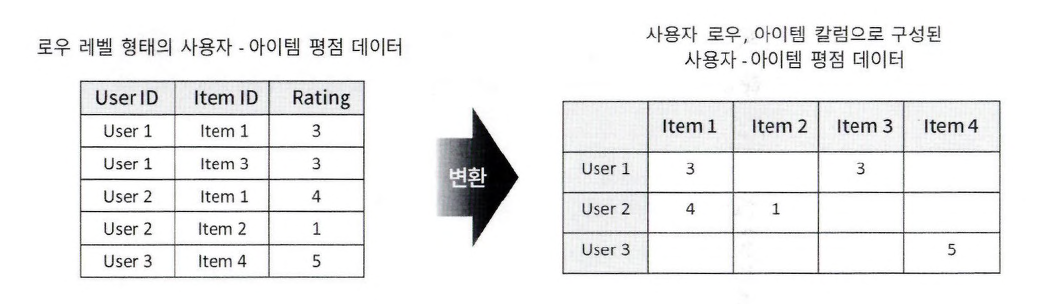

일반적으로 사용자 - 아이템 평점 행렬은 많은 아이템을 열로 가지는 다차원 행렬이며, 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬(Sparse Matrix) 특성을 가짐

최근접 이웃 협업 필터링( = 메모리 협업 필터링)

- 사용자 기반(User - User) : 당신과 비슷한 고객들이 다음 상품도 구매했습니다.

    특정 사용자와 유사한 다른 사용자를 Top - N으로 선정해 이 Top - N 사용자가 좋아하는 아이템을 추천하는 방식

    즉, 특정 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤 가장 유사도가 높은 Top - N 사용자를 추출해 그들이 선호하는 아이템을 추천하는 것

- 아이템 기반(Item - Item) : 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다.

    아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지 / 싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘

    아이템 기반 최근접 이웃 데이터 세트는 사용자 기반 최근접 이웃 데이터 세트와 행과 열이 서로 반대임(행 : 개별 아이템, 열 : 개별 사용자)

일반적으로 사용자 기반보다 아이템 기반 협업 필터링이 더 높은 정확도를 보임


## 잠재 요인 협업 필터링

### 잠재 요인 협업 필터링의 이해

잠재 요인 협업 필터링 : 사용자 - 아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법

- 행렬 분해(Matrix Facotization) : 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출하는 기법

'잠재 요인'이 어떤 것인지 명확히 정의할 수는 없으나 이러한 '잠재 요인'을 기반으로 다차원 희소 행렬인 사용자 - 아이템 행렬 데이터를 저차원 밀집 행렬의 사용자 - 잠재 요인 행렬과 아이템 - 잠재 요인 행렬의 전치 행렬로 분해할 수 있으며 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자 - 아이템 평점 행렬 데이터를 만들어서 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성하는 것이 잠재 요인 협력 필터링 알고리즘의 골자임

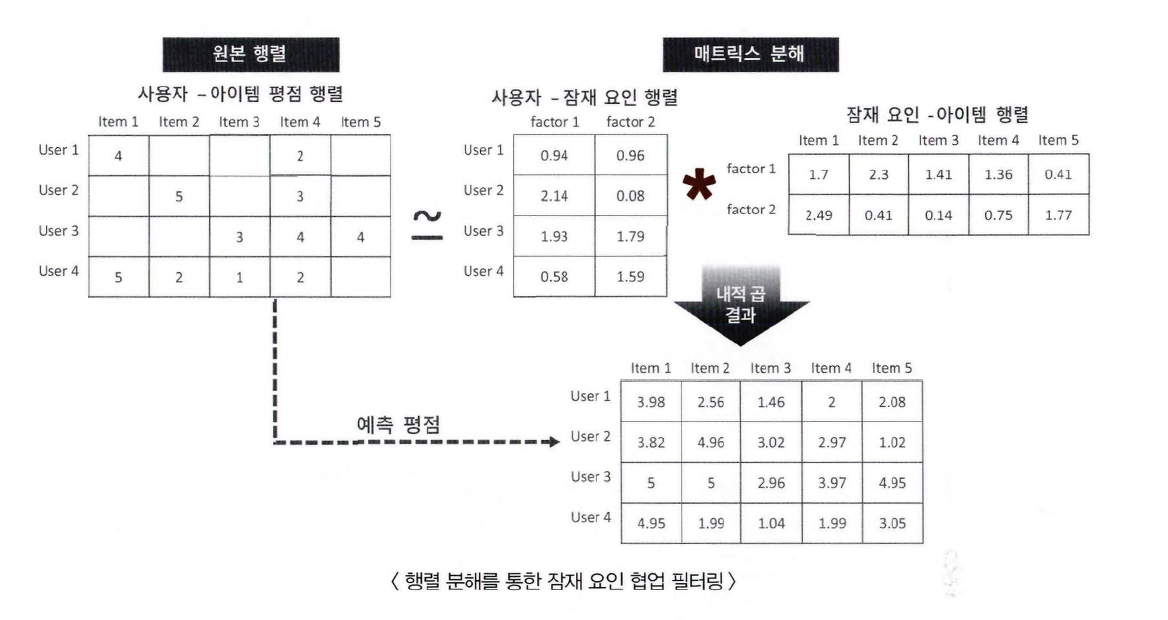

### 행렬 분해의 이해

행렬 분해 : 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법으로서 대표적으로 SVD(Singular Vector Decomposition), NMF(Non-Negative Matrix Factorization)등이 있음

M개의 사용자(User)행과 N개의 아이템(Item) 열을 가진 평점 행렬 R은 M X N 차원으로 구성되며 행렬 분해를 통해 사용자 - K 차원 잠재 요인 행렬과 K 차원 잠재 요인 - 아이템 행렬 Q.T로 분해될 수 있음

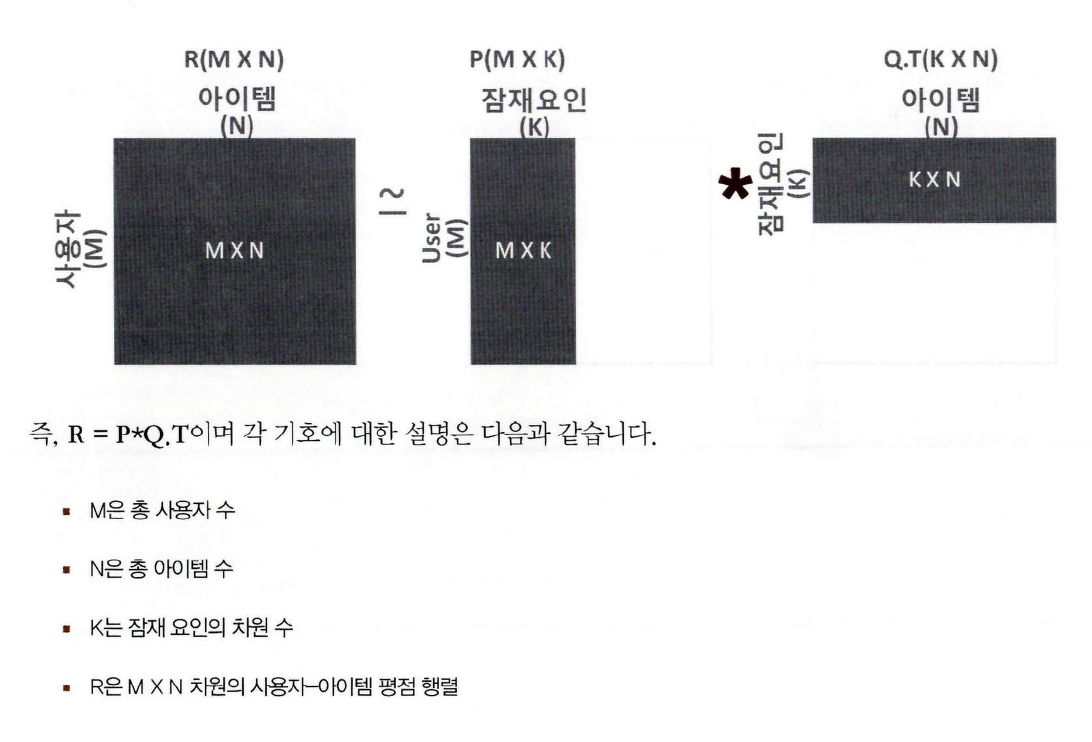
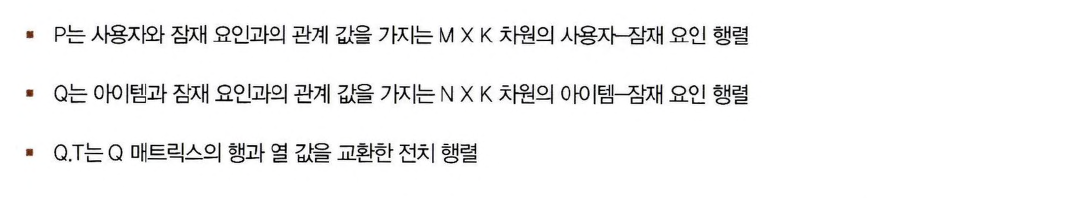

행렬 분해는 주로 SVD(Singular Value Decomposition) 방식을 이용하는데 이는 널(NaN) 값이 없는 행렬에만 적용할 수 있음

널(NaN)값이 있는 행렬은 확률적 경사 하강법(Stochastic Gradient Descent, SGD)이나 ALS(Alternating Least Squares)방식을 이용함

### 확률적 경사 하강법을 이용한 행렬 분해

확률적 경사 하강법 : P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트함
4. 만족할 만한 오류 값을 가질 때까지 2,3번 작업을 반복하면서 P와 Q값을 업데이트해 근사화함

<실제 값과 예측값의 오류 최소화와 L2 규제를 고려한 비용 함수식>

$$min\sum(r_{(u,i)}-p_uq_i^t)^2+\lambda(||q_i||^2+||p_u||^2)$$

<비용 함수를 최소화하기 위해 새롭게 업데이트되는 $\acute p_u$와$\acute q_i$>

$$\acute p_u = p_u + \eta(e_{(u,i}*q_i-\lambda*p_u)$$
$$\acute q_i = q_i + \eta(e_{(u,i}*p_y-\lambda*q_i)$$

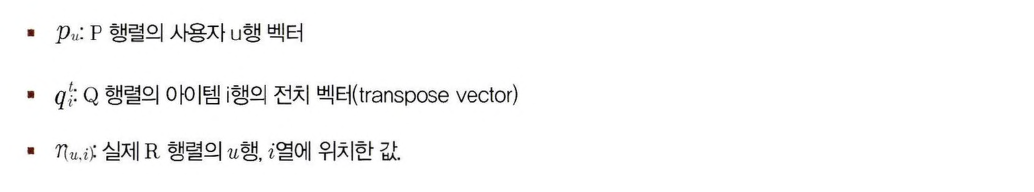
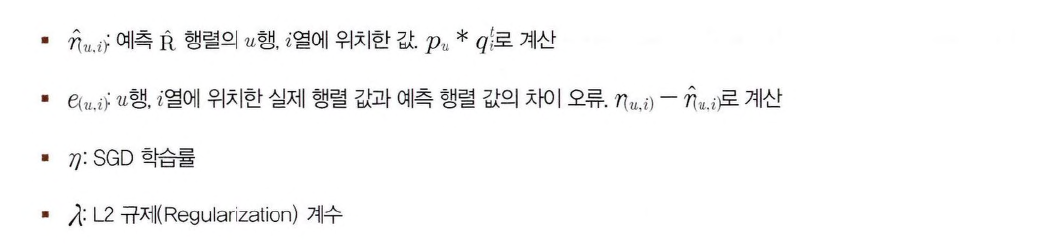

In [2]:
# SGD를 이용해 행렬 분해
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정
R = np.array([[4, np.nan, np.nan, 2, np.nan],
              [np.nan, 5, np.nan, 3, 1],
              [np.nan, np.nan, 3, 4, 4],
              [5, 2, 1, 2, np.nan]])
num_users, num_items = R.shape
K = 3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale = 1/K, size = (num_users, K))
Q = np.random.normal(scale = 1/K, size = (num_items, K))

In [5]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
    error=0
    # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)

    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

In [6]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

# steps: SGD를 반복해서 업데이트할 횟수
steps = 1000
# learning_rate: SGD의 학습률
learning_rate = 0.01
# r_lambda: L2 Regularization 계수
r_lambda = 0.01

# SGD 기법으로 우와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
    for i,j,r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i,:], Q[j,:].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate * (eij * Q[j,:] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate * (eij * P[i,:] - r_lambda*Q[j,:])

        rmse = get_rmse(R,P,Q,non_zeros)
        if (step % 50) == 0:
            print("### iteration step:", step, "rmse:", rmse)

### iteration step: 0 rmse: 3.259459570920174
### iteration step: 0 rmse: 3.2585295271131973
### iteration step: 0 rmse: 3.2521099280637533
### iteration step: 0 rmse: 3.250301384821969
### iteration step: 0 rmse: 3.2504784118719807
### iteration step: 0 rmse: 3.2492149633392726
### iteration step: 0 rmse: 3.247385782225293
### iteration step: 0 rmse: 3.245556255980146
### iteration step: 0 rmse: 3.2401598629557324
### iteration step: 0 rmse: 3.2382931118523164
### iteration step: 0 rmse: 3.238413055138202
### iteration step: 0 rmse: 3.2370465747107744
### iteration step: 50 rmse: 0.5015004152105822
### iteration step: 50 rmse: 0.5013163339724306
### iteration step: 50 rmse: 0.5001971542619058
### iteration step: 50 rmse: 0.5000256311100154
### iteration step: 50 rmse: 0.5001282058216056
### iteration step: 50 rmse: 0.4994928628629658
### iteration step: 50 rmse: 0.49959027043603593
### iteration step: 50 rmse: 0.49910871647594846
### iteration step: 50 rmse: 0.4911906296475222
### ite

In [7]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.99  0.783 1.341 2.003 1.729]
 [6.702 4.978 0.953 2.98  1.003]
 [6.933 0.42  2.987 3.976 3.986]
 [4.968 2.005 1.007 2.018 1.163]]


원본 행렬과 비교해 널이 아닌 값은 큰 차이가 나지 않으며 널인 값은 새로운 예측값으로 채워짐